# Predicting Winners of Men's Singles Tennis Matches

In this project, I will first review tennis player data from ATP to determine what factors contribute towards winning a singles match in a tennis tournament. I'm using the following data source from Kaggle: 
https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull/data

## Outline
I will use the following steps to proceed with analysis.
1. **Import Necessary Libraries and Packages**
2. **Data Loading**: Load the ATP dataset.
3. **Data Cleaning**: Handle missing values and ensure data consistency.
4. **Data Transformation**: Generate a dataset at the player-level and bring over respective match-related attributes; Create a target y column to calculate probability of winning the final round in the 2025 US Open.
5. **Prepare Training, Testing, Validation Datasets**
6. **Develop Predictive Models**: Set up multiple models (e.g. multivariate logistic, random forest, KNN) to best calculate the probability of winning the final round in the 2025 US Open.

## Import Necessary Libraries and Packages
First, we will import any necessary dependencies.

In [6]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]
# Install/upgrade kagglehub to latest version
%pip install --upgrade kagglehub[pandas-datasets]==0.3.12

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Loading
First we will load the ATP datasets from Kaggle.

In [2]:
# Set the path to the file you'd like to load
file_path = "atp_tennis.csv"  # Update this to the correct file name if needed

# Load the latest version
dfatp = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dissfya/atp-tennis-2000-2023daily-pull",
  # "dissfya/atp-tennis-daily-pull",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\sarah\AppData\Local\Temp\ipykernel_22640\3789264042.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dfatp = kagglehub.load_dataset(


In [3]:
# Display first 5 records
dfatp.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


## Data Cleaning
Get the number of records, number of columns, and check for missing values.

In [4]:
# get shape of the dataframe
print("Shape of the dataframe:", dfatp.shape)

Shape of the dataframe: (65974, 17)


In [5]:
# check for missing values
missing_values = dfatp.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [6]:
# List all Variables in the dataset
dfatp.dtypes

Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1         float64
Odd_2         float64
Score          object
dtype: object

## Data Pre-Processing  
In these next steps, I will exclude rows that are not relevant to predicting the top 5 players with the highest likelihood of winning the next men's singles titles at the 2025 US Open. This updated dataset will then be split into training and testing. A target y column to calculate probability of winning the final round in the 2025 US Open.

### Remove Matches Prior to 2020
I will filter out matches prior to 2020 to focus on more recent performance data.

In [8]:
# Filter out matches prior to 2020
dfatp2020 = dfatp[dfatp['Date'] >= '2020-01-01']
dfatp2020.shape

(13197, 17)

In [9]:
# Display first 5 records after filtering
dfatp2020.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
52777,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Mannarino A.,Bublik A.,Bublik A.,43,55,1111,919,1.72,2.00,3-6 4-6
52778,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,Sandgren T.,Moutet C.,81,68,638,803,1.57,2.25,7-6 6-4
52779,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Andujar P.,Verdasco F.,Verdasco F.,64,49,867,1025,3.75,1.25,4-6 3-6
52780,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Bedene A.,Ymer M.,Bedene A.,58,76,905,681,1.83,1.83,3-6 6-4 6-3
52781,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Barrere G.,Chardy J.,Chardy J.,83,54,636,920,2.50,1.50,3-6 6-3 3-6


### Remove Retired Players
Next, I am going to filter out players who have retired and therefore won't be playing in the 2025 US Open. I will use the retired players list from https://www.itia.tennis/anti-doping/retired-players-list/

In [14]:
import pandas as pd

# List of retired ATP players (based on ITIA retired players list)
retired_players = [
    'Federer R.',
    'Murray A.',
    'del Potro J.',
    'Tsonga J.',
    'Isner J.',
    'Anderson K.',
    'Querrey S.',
    'Simon G.',
    'Verdasco F.',
    'Kohlschreiber P.',
    'Nadal R.',  # Announced retirement from 2024 season
    'Bautista Agut R.',
    'Lopez F.',
    'Lorenzi P.',
    'Seppi A.',
    'Fognini F.',
    'Johnson S.',
    'Kukushkin M.',
    'Andujar P.',
    'Karlovic I.',
    'Troicki V.',
    'Granollers M.',
    'Petzschner P.',
    'Melzer J.',
    'Mahut N.',
    'Cuevas P.'
]

# Create a new dataframe excluding retired players from both Player columns
dfatp_active = dfatp2020[
    (~dfatp2020['Player_1'].isin(retired_players)) & 
    (~dfatp2020['Player_2'].isin(retired_players))
]

# Print comparison of records before and after filtering
print("Total records before filtering:", len(dfatp2020))
print("Total records after removing retired players:", len(dfatp_active))

# Display top 10 active players by matches played
active_players = pd.concat([
    dfatp_active['Player_1'].value_counts(),
    dfatp_active['Player_2'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False).head(10)

print("\nTop 10 Active Players by Matches Played:")
print(active_players)

# Update the main dataframe
# dfatp2020 = dfatp_active.copy()

Total records before filtering: 13197
Total records after removing retired players: 11912

Top 10 Active Players by Matches Played:
Rublev A.       349
Zverev A.       322
Tsitsipas S.    313
Medvedev D.     313
Sinner J.       310
Ruud C.         303
Fritz T.        296
De Minaur A.    281
Khachanov K.    280
Alcaraz C.      278
Name: count, dtype: int64


I will use the dfatp_active dataset to set up machine learning models.

In [15]:
# Extract the year and month from the Date column
dfatp_active['Year'] = pd.to_datetime(dfatp_active['Date']).dt.year
dfatp_active['Month'] = pd.to_datetime(dfatp_active['Date']).dt.month
# Display first 5 records after adding Year and Month
dfatp_active.head()

C:\Users\sarah\AppData\Local\Temp\ipykernel_22640\2167542472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfatp_active['Year'] = pd.to_datetime(dfatp_active['Date']).dt.year
C:\Users\sarah\AppData\Local\Temp\ipykernel_22640\2167542472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfatp_active['Month'] = pd.to_datetime(dfatp_active['Date']).dt.month


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Year,Month
52777,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Mannarino A.,Bublik A.,Bublik A.,43,55,1111,919,1.72,2.00,3-6 4-6,2020,1
52778,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,Sandgren T.,Moutet C.,81,68,638,803,1.57,2.25,7-6 6-4,2020,1
52780,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Bedene A.,Ymer M.,Bedene A.,58,76,905,681,1.83,1.83,3-6 6-4 6-3,2020,1
52781,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Barrere G.,Chardy J.,Chardy J.,83,54,636,920,2.50,1.50,3-6 6-3 3-6,2020,1
52782,Qatar Exxon Mobil Open,2020-01-06,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,Thompson J.,Kecmanovic M.,62,63,881,878,1.66,2.10,6-4 6-2,2020,1


In [ ]:
# Check that Year and Month have been added correctly
dfatp_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11912 entries, 52777 to 65973
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  11912 non-null  object 
 1   Date        11912 non-null  object 
 2   Series      11912 non-null  object 
 3   Court       11912 non-null  object 
 4   Surface     11912 non-null  object 
 5   Round       11912 non-null  object 
 6   Best of     11912 non-null  int64  
 7   Player_1    11912 non-null  object 
 8   Player_2    11912 non-null  object 
 9   Winner      11912 non-null  object 
 10  Rank_1      11912 non-null  int64  
 11  Rank_2      11912 non-null  int64  
 12  Pts_1       11912 non-null  int64  
 13  Pts_2       11912 non-null  int64  
 14  Odd_1       11912 non-null  float64
 15  Odd_2       11912 non-null  float64
 16  Score       11912 non-null  object 
 17  Year        11912 non-null  int32  
 18  Month       11912 non-null  int32  
dtypes: float64(2), int32(2), i

## Prepare Dataset for Machine Learning
In this step, I will import the necessary libraries needed, set up binary variables for categorical variables that will be used as features, and initiate the Random Forest Classifier model.

In [36]:
# Import necessary libraries for machine learning
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import *


In [24]:
# Create binary target: 1 if Player_1 wins, 0 if Player_2 wins
dfatp_active['target'] = (dfatp_active['Player_1'] == dfatp_active['Winner']).astype(int)

# Define features and target variable
# Drop the columns that are not used as features
features_to_drop = ['Winner', 'target', 'Date', 'Score', 'Player_1', 'Player_2']
X = dfatp_active.drop(columns=features_to_drop)
y = dfatp_active['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Display first ten records of training set
print("\nFirst ten records of training set:")
X_train.head(10)

Training set shape: (9529, 14) (9529,)
Testing set shape: (2383, 14) (2383,)

First ten records of training set:


C:\Users\sarah\AppData\Local\Temp\ipykernel_22640\1686935390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfatp_active['target'] = (dfatp_active['Player_1'] == dfatp_active['Winner']).astype(int)


,Tournament,Series,Court,Surface,Round,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Year,Month
54465,Open 13,ATP250,Indoor,Hard,2nd Round,3,52,138,1144,536,1.40,3.000,2021,3
63421,Citi Open,ATP500,Outdoor,Hard,3rd Round,3,175,60,343,831,3.50,1.300,2024,8
63386,Croatia Open,ATP250,Outdoor,Clay,Semifinals,3,37,9,1290,3830,2.50,1.530,2024,7
53309,Chile Open,ATP250,Indoor,Clay,Semifinals,3,45,38,1085,1219,2.37,1.570,2020,2
64238,Adelaide International,ATP250,Outdoor,Hard,2nd Round,3,77,39,716,1315,1.57,2.380,2025,1
60377,Queen's Club Championships,ATP500,Outdoor,Grass,2nd Round,3,36,2,1048,7175,4.50,1.200,2023,6
55164,French Open,Grand Slam,Outdoor,Clay,1st Round,5,1,66,11313,1033,29.00,0.967,2021,6
53556,Internazionali BNL d'Italia,Masters 1000,Outdoor,Clay,3rd Round,3,14,42,2345,1146,1.33,3.250,2020,9
54839,Serbia Open,ATP250,Outdoor,Clay,Semifinals,3,1,28,11873,1946,1.12,6.000,2021,4
61638,Adelaide International,ATP250,Outdoor,Hard,Quarterfinals,3,31,25,1369,1435,1.91,1.910,2024,1


Due to issues with categorical data, I needed to set up one-hot encoding, per below.

In [27]:
# Separate categorical and numerical columns
categorical_features = ['Tournament', 'Series', 'Court', 'Surface', 'Round']
numeric_features = ['Best of', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Year', 'Month']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='mean')),
	('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
	('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
	('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
	transformers=[
		('num', numeric_transformer, numeric_features),
		('cat', categorical_transformer, categorical_features)
	])

A new pipeline is created, and training data is fitted to the Random Forest Classifer model.

In [29]:
# Create a new pipeline with the preprocessor and classifier
final_pipeline = Pipeline([
	('preprocessor', preprocessor),
	('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Best of', 'Rank_1',
                                                   'Rank_2', 'Pts_1', 'Pts_2',
                                                   'Odd_1', 'Odd_2', 'Year',
                                                   'Month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Tournament', 'Series',
                                                   'Court', 'Surface',
                                                   'Round'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Next, I will use the trained model to make predictions on the test set and evaluate its performance.

In [37]:
# Predicting on the test set
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1] #Predict probability of Player_1 winning

Next, I will run metrics to evaluate how well the Random Forest Classifier model predicts the winning player.

In [38]:
# Create a dictionary to hold the metrics
metrics = {}

# Basic Classification Metrics
metrics['accuracy'] = accuracy_score(y_test, y_pred)
metrics['precision'] = precision_score(y_test, y_pred, average='weighted') #reason for using 'weighted' is to account for class imbalance (data skewness)
metrics['recall'] = recall_score(y_test, y_pred, average='weighted')
metrics['f1_score'] = f1_score(y_test, y_pred, average='weighted')

# Additional Metrics
metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
metrics['log_loss'] = log_loss(y_test, y_pred_proba)
metrics['mcc'] = matthews_corrcoef(y_test, y_pred) # Matthews correlation coefficient is a balanced measure that can be used even if the classes are of very different sizes.

# Random Forest Classifier Specific Metrics
metrics['oob_score'] = final_pipeline.oob_score_ if hasattr(final_pipeline.named_steps['classifier'], 'oob_score_') else None

# Cross-validation scores
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='accuracy')
metrics['cv_mean'] = cv_scores.mean()
metrics['cv_std'] = cv_scores.std()

# Display the metrics
print("\nClassification Metrics:")
for metric, value in metrics.items():
	if isinstance(value, np.ndarray):
		print(f"{metric}:\n{value}\n")
	else:
		print(f"{metric}: {value}")


Classification Metrics:
accuracy: 0.6508602601762484
precision: 0.6510709763090303
recall: 0.6508602601762484
f1_score: 0.650875753975862
roc_auc: 0.7140171771187813
confusion_matrix:
[[771 402]
 [430 780]]

log_loss: 0.6373827934903118
mcc: 0.3018903028260517
oob_score: None
cv_mean: 0.6619792174456682
cv_std: 0.008572215403395363


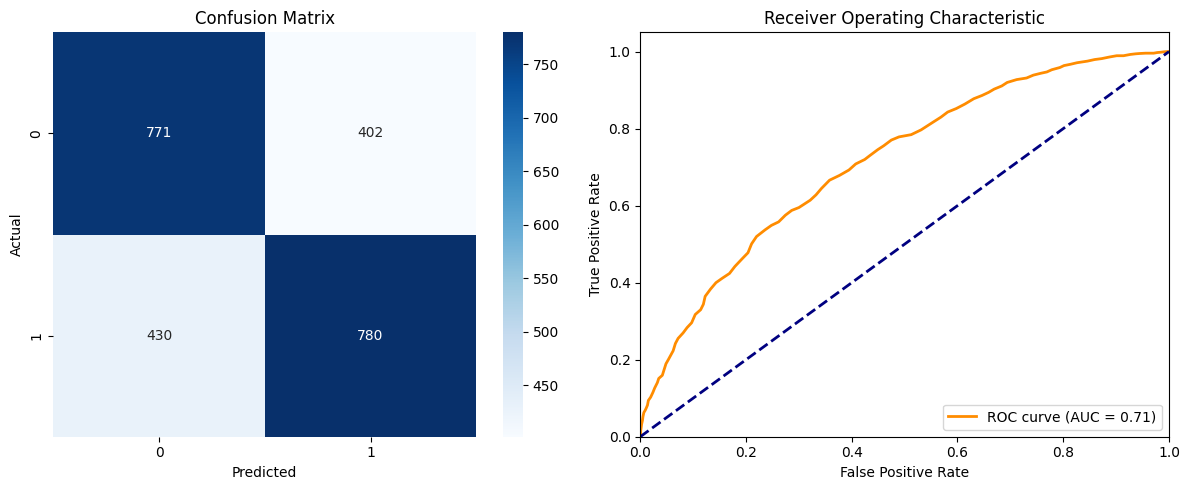

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

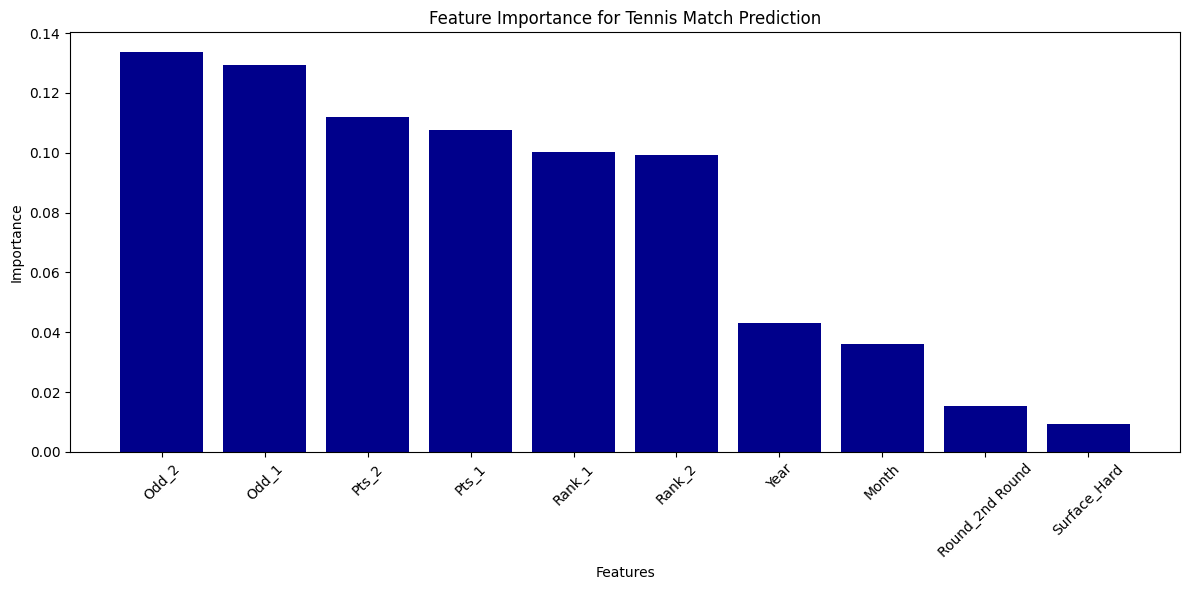


Top 10 most important features:
1. Odd_2 (0.133562)
2. Odd_1 (0.129452)
3. Pts_2 (0.111932)
4. Pts_1 (0.107689)
5. Rank_1 (0.100176)
6. Rank_2 (0.099267)
7. Year (0.043077)
8. Month (0.036001)
9. Round_2nd Round (0.015440)
10. Surface_Hard (0.009404)


In [43]:
# Get feature importances from the random forest classifier
feature_names = (numeric_features + 
                preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist())

importances = final_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(10), importances[indices[:10]], align='center', color='darkblue')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Tennis Match Prediction')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 most important features:")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Let us see the model predictions of the first 10 records.

In [46]:
# Create a dataframe with actual match information and predictions
prediction_df = X_test.copy()
prediction_df['Predicted_Win_Probability'] = y_pred_proba
prediction_df['Actual_Winner'] = y_test
prediction_df['Predicted_Winner'] = y_pred

# Display first 10 records with predictions
display_columns = ['Tournament', 'Round', 'Predicted_Win_Probability', 'Actual_Winner', 'Predicted_Winner']
print("\nFirst 10 Match Predictions: 1 = Player 1 Wins, 0 = Player 2 Wins")
pd.set_option('display.max_columns', None)
prediction_df[display_columns].head(10)


First 10 Match Predictions: 1 = Player 1 Wins, 0 = Player 2 Wins


,Tournament,Round,Predicted_Win_Probability,Actual_Winner,Predicted_Winner
54459,Open 13,1st Round,0.19,0,0
64972,Monte Carlo Masters,1st Round,0.71,1,1
60047,Internazionali BNL d'Italia,2nd Round,0.46,0,0
62083,Abierto Mexicano,Quarterfinals,0.30,0,0
56004,US Open,Semifinals,0.68,1,1
64027,Vienna Open,1st Round,0.23,0,0
55448,Wimbledon,2nd Round,0.56,1,1
65568,Mallorca Championships,2nd Round,0.61,1,1
65897,Canadian Open,1st Round,0.37,0,0
62217,BNP Paribas Open,3rd Round,0.12,0,0


## Discussion and Conclusion
Overall, the Random Forest Classification model predicts match winners with a 65% precision (percent of true positives out of all positives). The Area Under the Curve is 0.714, which suggests that this model is fair and has some ability to predict match winners. To improve the model, I am considering filtering the dataset down to include only tournaments played on hard surfaces. Additional metrics such as the following can be considered as well:  
- calculating probability of winning based on the Odd_1 and Odd_2 columns
- caclulating upset detection (where player with lower probability of winning wins the match)